# Quantum gates

-- Quantum COmputing from A-TO Z Udemy Course clase 11

In [11]:
from qiskit import *
import qiskit.visualization as viz
import numpy as np
import matplotlib.pyplot as plt


# State City

- State City me mostrará un gráfico de un estado cuántico o una matriz de densidad, en un formato parecirdo a una ciudad, esto sucederá para la parte real y la parte imaginaria del estado del vector. Cabe recordar que el "densitymatrix" es un estado cuántico mezclado (ampliar más) es una generalización (...) (Born Rule.)

In [12]:
# Utilities to draw and run
def draw_visualizers(circuit):
    backend = Aer.get_backend('statevector_simulator')
    result = execute(circuit,backend).result()
    output = result.get_statevector(circuit, decimals=2)
    return viz.plot_state_city(output)


# Bloch Sphere

Es una forma de... representar el qubit y visualizar lso cambios que acontecen

In [57]:
def draw_blochsphere(circuit, info=['m','f']):
    # m : Minimum report
    # f : Full report
    backend = Aer.get_backend('statevector_simulator')
    quantum_obj = assemble(circuit)
    state = backend.run(quantum_obj).result().get_statevector()
    vector  = state.data # numpy.ndarray
    dim = state.dim # Dimension
    if info=='m':
        #Minimum
        n_qubits = quantum_obj.config.n_qubits
        shots = quantum_obj.config.shots
        info_vector = f'Vector: {vector} , Dimensions: {dim}' 
        print(info_vector)
    elif info=='f':
        #Full Report
        print(quantum_obj)
        print("_"*100)
        info_vector = f'Vector: {vector} , Dimensions: {dim}' # Muestra  de vector completo
        print(info_vector)
    return viz.plot_bloch_multivector(state)


# Hilbert Basis vectors


Al crear nuestro circuito nuestro qubit empezará en el estado $\ket{0} = \begin{bmatrix}1\\0\end{bmatrix}$, podemos expresar cualquier estado $\ket{psi}$ en sus bases correspondientes:

$$\ket{\psi} =\alpha_1 \begin{bmatrix}1\\0\end{bmatrix}+\alpha_2 \begin{bmatrix}0\\1\end{bmatrix}$$

O en notación de Kets:

$$\ket{\psi} =\alpha_1\ket{0}+\alpha_2\ket{1}$$

También podemos descomponer un qubit en dos vectores con signo positivo o negativo:


- $$\ket{+} =\frac{1}{\sqrt{2}}\begin{bmatrix}1\\1\end{bmatrix}$$
- $$\ket{-} =\frac{1}{\sqrt{2}}\begin{bmatrix}1\\-1\end{bmatrix}$$

Y esto también es cierto:

$$\ket{\psi} =\alpha_1\ket{0}+\alpha_2\ket{1} = \alpha_3\ket{+}+\alpha_4\ket{-}$$

Creemos nuestro primer circuito para manipular el estado del qubit y así poder operar con diferentes compeurtas.

Vector: [1.+0.j 0.+0.j] , Dimensions: 2


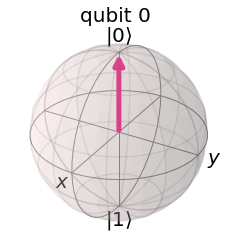

: 

In [60]:
circuit = QuantumCircuit(1)
initial_state = draw_blochsphere(circuit, info='m')
initial_state


# Hadamard Gate

Complementar con Quantum Less
Mostrar la matriz  y un ejemplo de lo que opera.

-------


Un qubit al que se le aplica la compuerta de Hadamard le ocurre lo siguiente en términos matemáticos:

$$H\ket{\psi} =\alpha_1(H\ket{0})+\alpha_2(H\ket{1})$$ 

Esta operación resulta en la tranformacióna las bases positiva y negativa:

$$H\ket{\psi} =\alpha_1\ket{+}+\alpha_2\ket{-}$$

Si volviesemos a aplicar la compuerta de Hadamard:

$$H^2\ket{\psi} =\alpha_1(H\ket{+})+\alpha_2(H\ket{-})$$ 

Obtendríamos de vuelta nuestras bases iniciales.

$$H\ket{\psi} =\alpha_1(H\ket{0})+\alpha_2(H\ket{1})$$ 

Obtenemos de lo anterior algunas generalizaciones, y que esta operación es reversible.

- $H\ket{0} = \ket{+}$
- $H\ket{1} = \ket{-}$

QASM Qobj: e09a9c3e-0723-408f-967b-f94b1f009b85:
Config: {'init_qubits': True,
 'meas_level': <MeasLevel.CLASSIFIED: 2>,
 'memory': False,
 'memory_slots': 0,
 'n_qubits': 1,
 'parameter_binds': [],
 'shots': 1024}
Header: {}
Experiments:

QASM Experiment:
Header:
{'clbit_labels': [],
 'creg_sizes': [],
 'global_phase': 0.0,
 'memory_slots': 0,
 'metadata': {},
 'n_qubits': 1,
 'name': 'circuit-112',
 'qreg_sizes': [['q', 1]],
 'qubit_labels': [['q', 0]]}
Config:
{'memory_slots': 0, 'n_qubits': 1}

	Instruction: h
		qubits: [0]


State:  Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


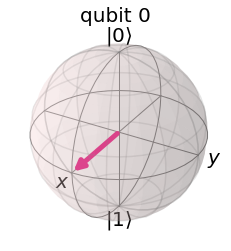

In [23]:
circuit = QuantumCircuit(1) # Un solo canal
circuit.h(0) # Añadimos al canal del qubit 0 la compuerta de Hadamar
draw_visualizers(circuit)
draw_blochsphere(circuit)

## Pauli Gate

Las compuertas de Pauli son matrices unitarias es decir, si multiplicamos $\sigma_i^{\dag}*\sigma_i$ obtenemos la identidad $I$, tenemos representación de estas con los nombres $x,y,z$ haciendo referencia a rotaciones. Estas oepraciones también son reversibles:


$$\sigma_x =\begin{bmatrix}0&1\\1&0\end{bmatrix}  , \sigma_x^2$$
$$\sigma_y =\begin{bmatrix}0&-i\\i&0\end{bmatrix} , \sigma_y^2$$
$$\sigma_z =\begin{bmatrix}1&0\\0&-1\end{bmatrix} , \sigma_z^2$$

- También pasa que si sumamos la diagonal $Tr(\sigma_i)=0$. 
- Involuciona(Buscar y curar el término): $-i\sigma_x\sigma_y\sigma_z=I$

#### Ejercicio

Aplicar las matrices de Pauli al qubit con el siguiente estado:

$$\ket{\psi} = \frac{1}{\sqrt{5}}\ket{0} + \frac{2}{\sqrt{5}}\ket{1}$$

**Respuesta**:

$$\ket{\psi} = \frac{1}{\sqrt{5}}(\sigma_x\ket{0}) + \frac{2}{\sqrt{5}}(\sigma_x\ket{1})$$
$$\ket{\psi} = \frac{1}{\sqrt{5}}(\begin{bmatrix}0&1\\1&0\end{bmatrix}\begin{bmatrix}1\\0\end{bmatrix}) + \frac{2}{\sqrt{5}}(\begin{bmatrix}0&1\\1&0\end{bmatrix}\begin{bmatrix}0\\1\end{bmatrix})$$
$$\ket{\psi} = \frac{1}{\sqrt{5}}(\begin{bmatrix}0\\1\end{bmatrix}) + \frac{2}{\sqrt{5}}(\begin{bmatrix}1\\1\end{bmatrix})$$


Verificar ejercicio y completar para las demás matrices de Pauli.



## Phase Shift

Tenemos una matriz para un cambio de fase:

$$R_{\theta}\ket{\psi} =\begin{bmatrix}1&0\\0&e^{i\theta}\end{bmatrix}(\alpha_1\begin{bmatrix}1\\0\end{bmatrix}+\alpha_2\begin{bmatrix}0\\1\end{bmatrix}) )$$

$$R_{\theta}\ket{0} =\begin{bmatrix}1&0\\0&e^{i\theta}\end{bmatrix}\begin{bmatrix}1\\0\end{bmatrix} = \ket{0}$$

$$R_{\theta}\ket{1} =\begin{bmatrix}1&0\\0&e^{i\theta}\end{bmatrix}\begin{bmatrix}1\\0\end{bmatrix} = e^{i\theta}\ket{1}$$

En otras palabras operamos la formula de euler a lso componentes de las bases, en el caso de la segunda base, se suman los exponentes.


$$\ket{\psi} =R_1e^{i\theta_1}\begin{bmatrix}1\\0\end{bmatrix}+R_2e^{i\theta_2}\begin{bmatrix}0\\1\end{bmatrix})$$

$$\ket{\psi} =R_1e^{i\theta_1}\begin{bmatrix}1\\0\end{bmatrix}+R_2e^{i\theta_2+\phi}\begin{bmatrix}0\\1\end{bmatrix})$$

La idea de este capitulo es mostrar las diferentes compuertas que se vieron en el anterior, y ver como van modificando la "bloch_sphere", así como mostrar lo que ocurre con un estado.

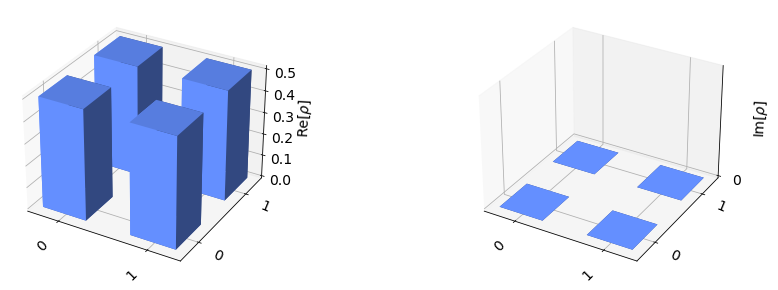

# Aqui explicar lo que acontece con Hadamard 

Matemáticamente que pasa, con las operaciones  cuando se aplica una o dos veces.
Al menos hacer referencia a las ecuaciones como libros con números "Ecuación 1"  Ecuación 5.1.12 para cuando haga refrencia a ecuaciones en otros notebooks. (Se podrán hipervincular?)

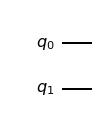

In [16]:
# Ahra revsemos dos qubits
circuit = QuantumCircuit(2)
circuit.draw("mpl")

In [17]:
backend = Aer.get_backend('statevector_simulator')
backend

StatevectorSimulator('statevector_simulator')

In [18]:
result = execute(circuit,backend).result()
#result of execution

In [19]:
output = result.get_statevector(circuit, decimals=2)
output.to_dict()

{'00': (1+0j)}

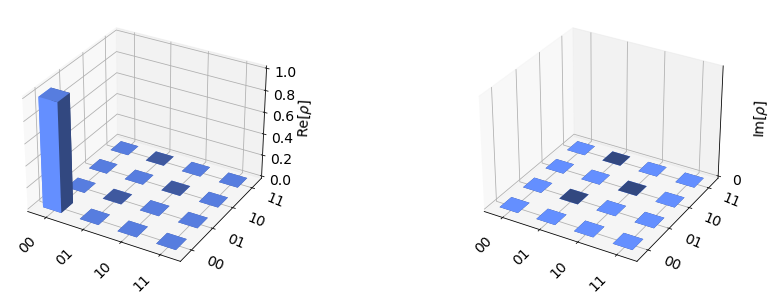

In [20]:
draw_visualizers(circuit)

# Añadir al circuito trnaformaciones una a una y visualizar

- Crear una función que me de un set de visualizaciones y datos formateados que expresen algo para mostrar lo que aconteció

In [21]:
circtuit.x(0)
circuit.draw("mpl")

NameError: name 'circtuit' is not defined

In [ ]:
draw_visualizers(circuit)